In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Preprocesado y modelado
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import norm
from sklearn.feature_selection import SelectKBest

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns



# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import   RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostClassifier
from xgboost import XGBRegressor 

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


c:\Users\laura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [4]:
# Importación de datos:

file_path = '../data/tudato.csv'  

data = pd.read_csv(file_path)

In [5]:
df = data.copy()

**CUADRO DEFINICIÓN VARIABLES**

|Columna| Descripción | 
|---|----|
|GHI| irradiancia global horizontal/ Potencia fotovoltaica| 
|Gas| precio del gas en el momento de la medición| 
|Festivo| Booleano indicando si el dia del registro era o no domingo/festivo (influye en el precio de la energía)| 
|PotenciaViento| Watios potencia generados por energía eólica| 
|Precios| TARGET - Precio de la energía | 
|Ano| Año del registro| 
|Mes| Mes del registro| 
|Dia| Día del registro| 
|Hora| hora del registro| 
|GMT| zona horaria| 

In [41]:
print(df.shape)
print('-------'*100)
print(df.columns)
print('-------'*100)
df.info()

(67127, 10)
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['GHI', 'Festivo', 'Gas', 'PotenciaViento', 'Precios', 'Ano', 'Mes',
       'Dia', 'Hora', 'GMT'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
df

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
0,114.000,1,16.93,18104.000,48.55,2016,1,1,0,1
1,114.000,1,16.93,19895.000,40.00,2016,1,1,1,1
2,114.000,1,16.93,21981.000,33.10,2016,1,1,2,1
3,114.000,1,16.93,25509.000,28.11,2016,1,1,3,1
4,114.000,1,16.93,30320.000,27.13,2016,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...
67122,8086.000,0,72.00,11135.500,108.49,2023,8,28,19,2
67123,2393.083,0,72.00,11101.333,133.52,2023,8,28,20,2
67124,782.750,0,72.00,10576.333,138.08,2023,8,28,21,2
67125,674.083,0,72.00,10107.167,123.72,2023,8,28,22,2


In [44]:
df.dtypes

GHI               float64
Festivo             int64
Gas               float64
PotenciaViento    float64
Precios           float64
Ano                 int64
Mes                 int64
Dia                 int64
Hora                int64
GMT                 int64
dtype: object

In [7]:
df.describe().round(2)

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
count,67127.00,67127.00,67127.00,67127.00,67127.00,67127.00,67127.00,67127.00,67127.00,67127.00
mean,13871.59,0.16,31.74,36440.01,74.28,2019.34,6.35,15.71,11.50,1.59
std,23990.61,0.37,33.05,26951.99,59.26,2.22,3.41,8.79,6.92,0.49
min,-566.00,0.00,0.00,245.25,0.00,2016.00,1.00,1.00,0.00,1.00
25%,356.00,0.00,14.50,16580.50,40.69,2017.00,3.00,8.00,6.00,1.00
50%,3832.00,0.00,20.00,30633.00,53.49,2019.00,6.00,16.00,12.00,2.00
75%,19113.50,0.00,29.65,49866.50,83.35,2021.00,9.00,23.00,17.50,2.00
max,312107.00,1.00,240.00,236932.00,700.00,2023.00,12.00,31.00,23.00,2.00


In [46]:
print(df.isnull().sum())
print('-----'*100)
print('Duplicated:', df.duplicated().sum())

GHI               0
Festivo           0
Gas               0
PotenciaViento    0
Precios           0
Ano               0
Mes               0
Dia               0
Hora              0
GMT               0
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicated: 0


<Axes: >

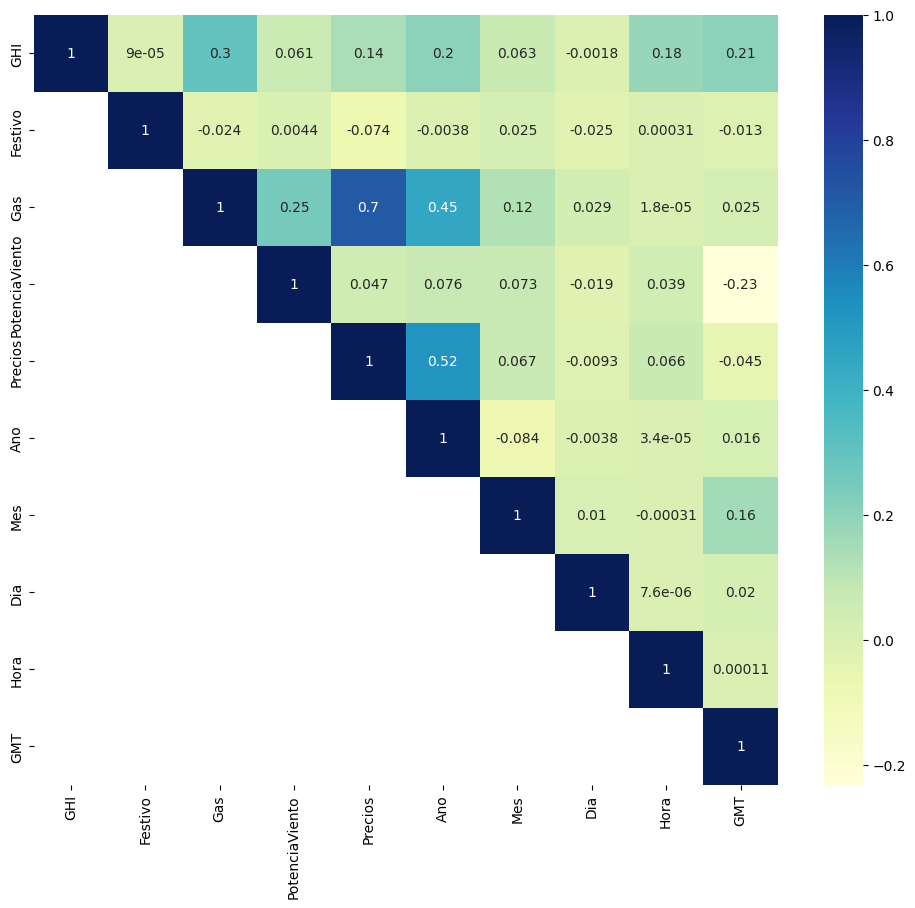

In [6]:
corr_matrix = df.corr()

# Create a mask to hide the upper triangle (including the diagonal)
mask = np.tri(corr_matrix.shape[0], k=-1, dtype=bool)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu')

In [48]:
corr_matrix.shape

(10, 10)

In [49]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="Report")
# profile

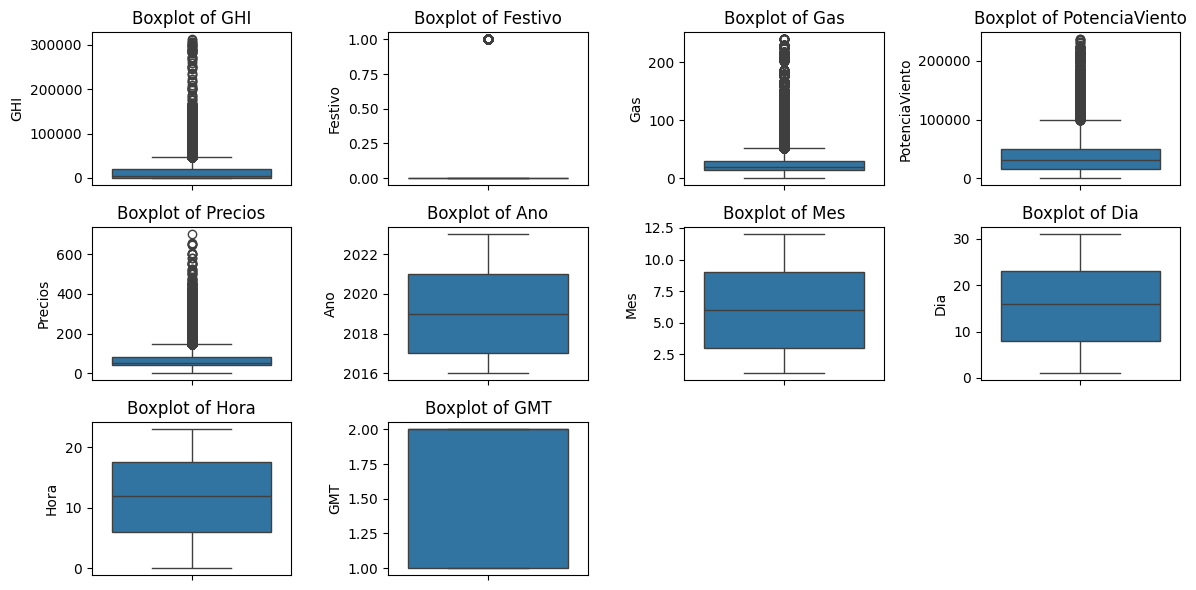

In [50]:
# Define the number of columns per row
columns_per_row = 4

# Iterate over each column and create a separate boxplot
num_columns = len(df.columns)
num_rows = -(-num_columns // columns_per_row)  # Ceiling division to calculate the number of rows needed
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(12, 6))

# Flatten the axes array if only one row is needed
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(data.columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.boxplot(data=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for i in range(num_columns, num_rows * columns_per_row):
    row = i // columns_per_row
    col = i % columns_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [51]:
# for column in data.columns:
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(data=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

<Axes: xlabel='Precios', ylabel='Count'>

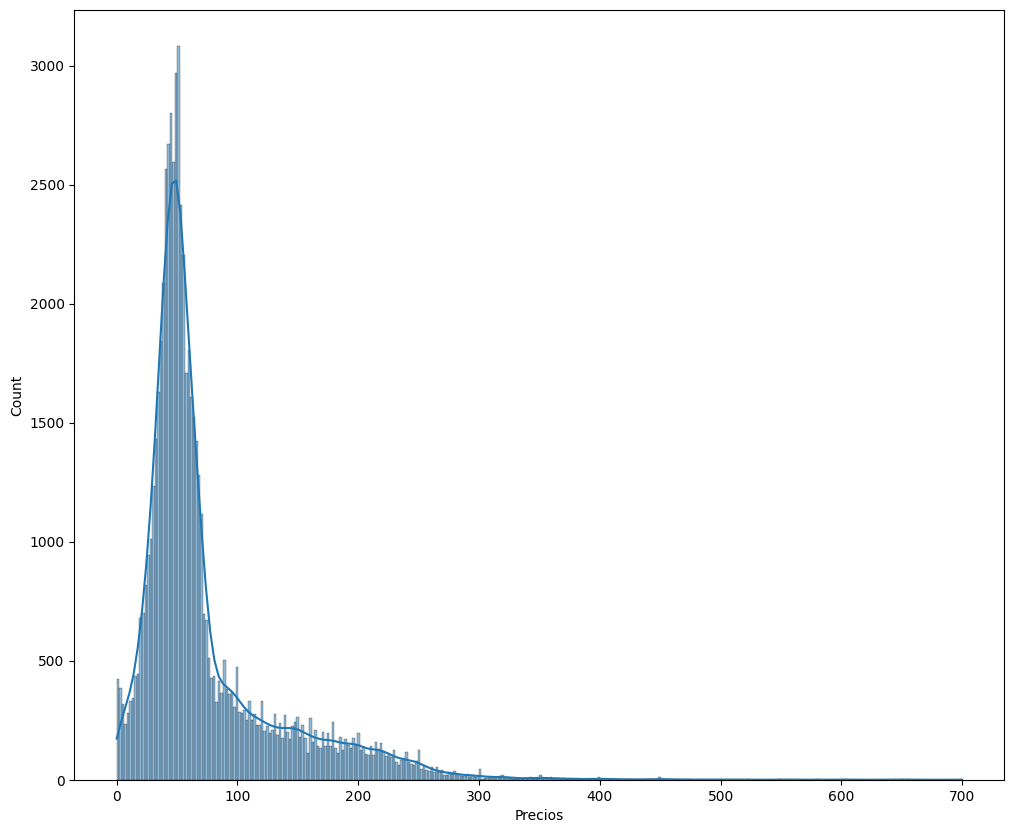

In [52]:
plt.figure(figsize=(12, 10))
sns.histplot(df['Precios'], kde = True)

In [53]:
df[df['Precios']>400]

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
52401,2618.0,0,159.5,31077.0,400.03,2021,12,23,9,1
52402,7259.0,0,159.5,32060.0,400.01,2021,12,23,10,1
52405,12407.0,0,159.5,37286.0,400.75,2021,12,23,13,1
52406,10284.0,0,159.5,37812.0,400.75,2021,12,23,14,1
52407,7305.0,0,159.5,40224.0,403.00,2021,12,23,15,1
...,...,...,...,...,...,...,...,...,...,...
54258,14321.0,0,150.0,63585.0,415.64,2022,3,10,18,1
54259,2968.0,0,150.0,63832.0,443.75,2022,3,10,19,1
54260,1442.0,0,150.0,67126.0,430.01,2022,3,10,20,1
54261,811.0,0,150.0,71092.0,408.29,2022,3,10,21,1


<Axes: xlabel='GHI', ylabel='Count'>

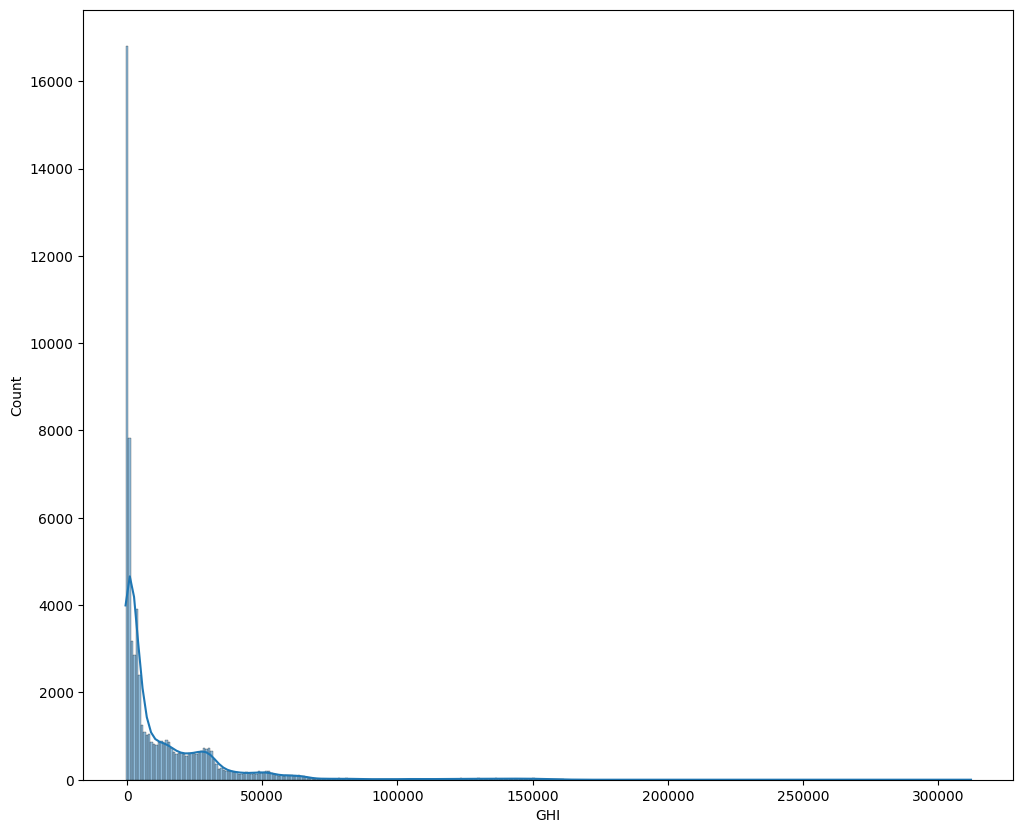

In [54]:
plt.figure(figsize=(12, 10))
sns.histplot(df['GHI'], kde = True)

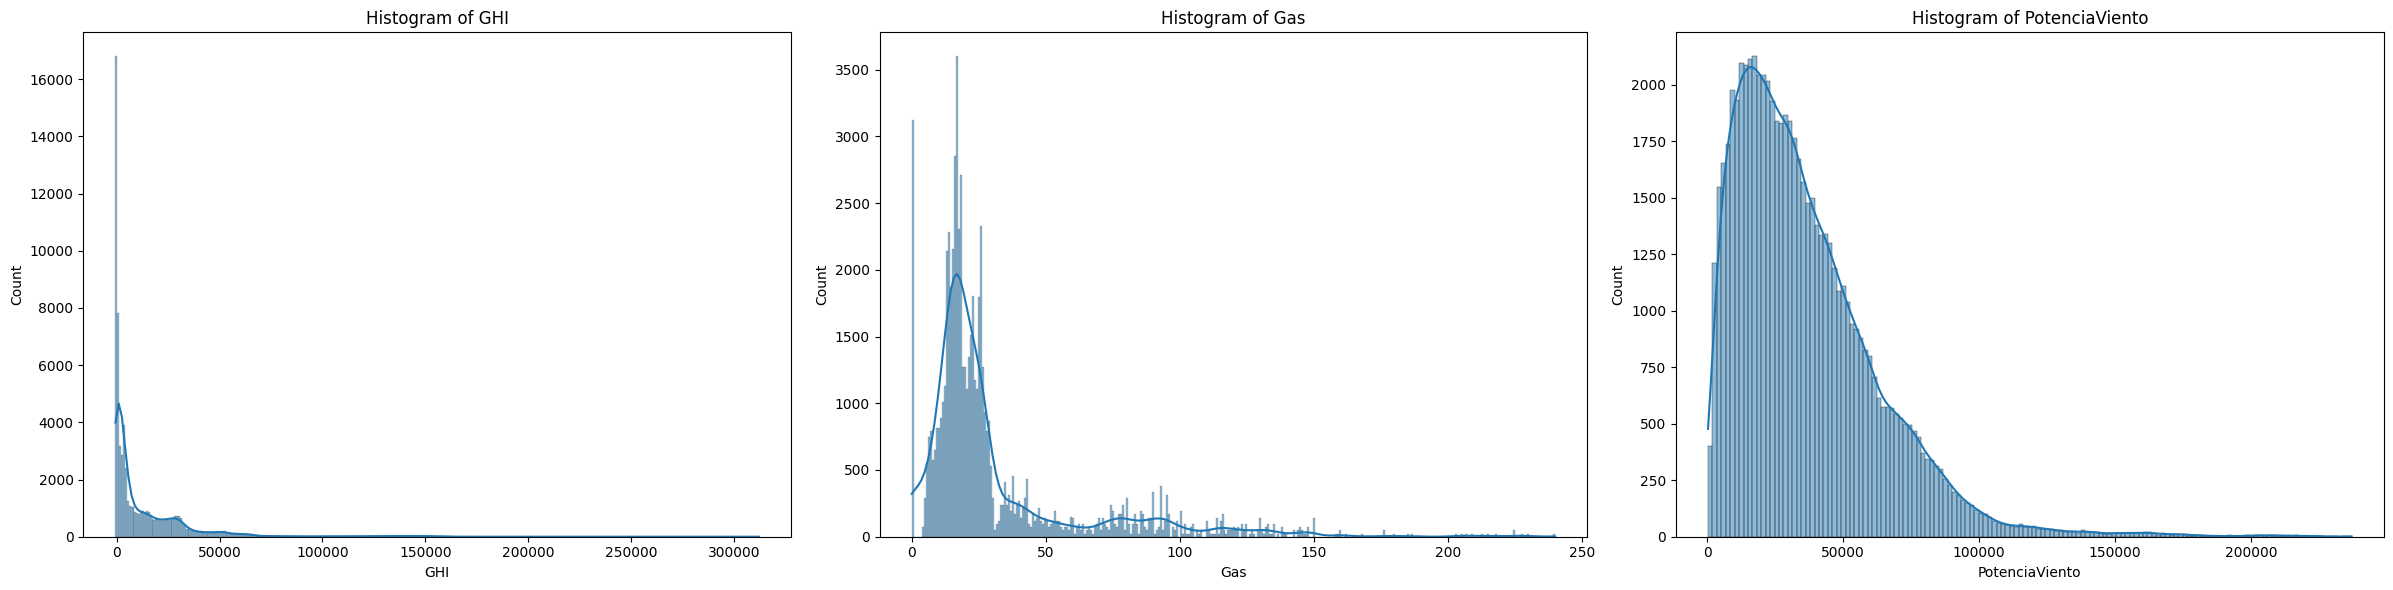

In [55]:
# Define the number of columns per row
columns_per_row = 4


# Define the columns you want to plot
columns = ['GHI', 'Gas', 'PotenciaViento']

# Define the width of each plot
plot_width = 8

# Calculate the height of each plot based on the aspect ratio
aspect_ratio = 0.75  # Adjust this value to control the height
plot_height = plot_width * aspect_ratio

# Iterate over each column and create a separate histplot
num_columns = len(columns)
num_rows = -(-num_columns // columns_per_row)  # Ceiling division to calculate the number of rows needed
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(plot_width * columns_per_row, plot_height * num_rows))

# Flatten the axes array if only one row is needed
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(columns):
    row = i // columns_per_row
    col = i % columns_per_row
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')

# Hide any unused subplots
for i in range(num_columns, num_rows * columns_per_row):
    row = i // columns_per_row
    col = i % columns_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

<Axes: xlabel='GHI', ylabel='Precios'>

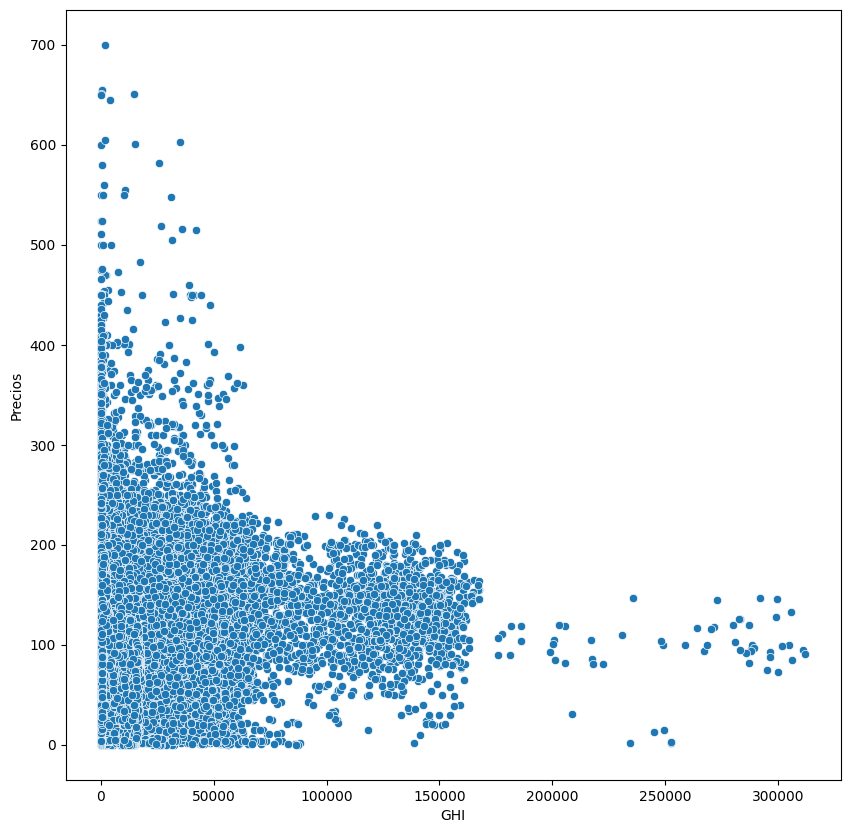

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='GHI', y='Precios')

<Figure size 1000x1000 with 0 Axes>

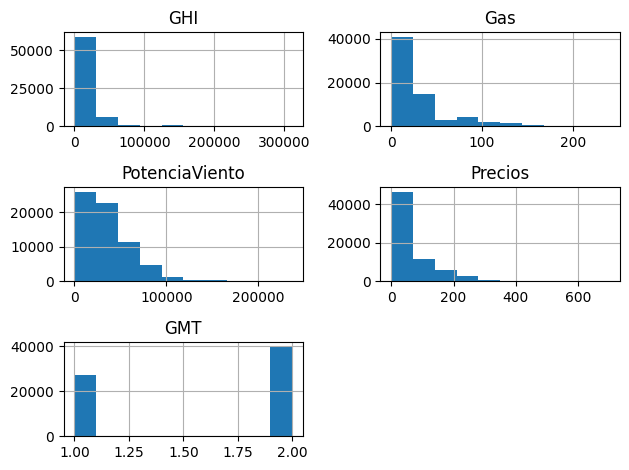

In [59]:
plt.figure(figsize=(10,10))

df.drop(columns=[ 'Festivo', 'Ano', 'Mes', 'Dia', 'Hora']).hist()
plt.tight_layout()

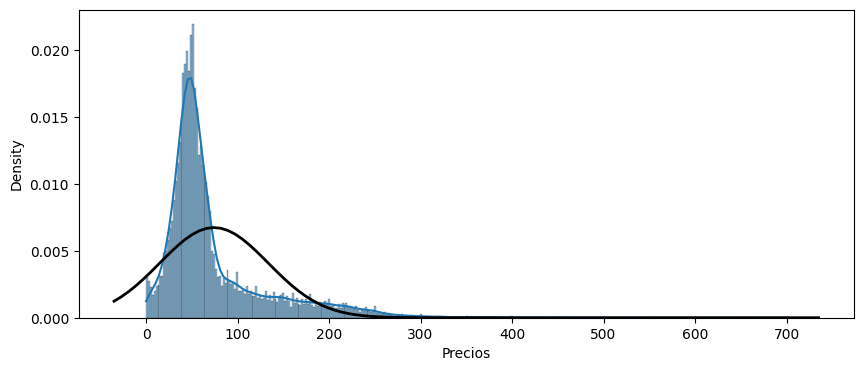

In [35]:
plt.figure(figsize=(10,4))
sns.histplot(df["Precios"], kde=True, stat="density")

mu, std = df["Precios"].mean(), df["Precios"].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [57]:
df[df['Gas']==0]
# días en los que la compra de gas no fue necesaria, por lo que el valor es 0. No los tratamos como outliers

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
11303,1197.000,1,0.0,39573.000,46.95,2017,4,16,0,2
11304,1135.000,1,0.0,38502.000,38.59,2017,4,16,1,2
11305,920.000,1,0.0,37281.000,35.51,2017,4,16,2,2
11306,805.000,1,0.0,36747.000,33.99,2017,4,16,3,2
11307,499.000,1,0.0,35097.000,33.10,2017,4,16,4,2
...,...,...,...,...,...,...,...,...,...,...
67002,7929.917,0,0.0,4840.667,153.79,2023,8,23,19,2
67003,2348.500,0,0.0,5008.750,168.08,2023,8,23,20,2
67004,774.667,0,0.0,5608.083,180.34,2023,8,23,21,2
67005,662.083,0,0.0,5844.500,170.01,2023,8,23,22,2


In [4]:
df.loc[df['GHI'] < 0, 'GHI'] = 0
# cambio por 0 los valores negativos, ya que la irradiancia no tiene sentido que sea negativa

In [60]:
# sns.pairplot(df)

In [1]:
!pip list


Package           Version
----------------- -----------
asttokens         2.4.1
colorama          0.4.6
comm              0.2.1
debugpy           1.8.1
decorator         5.1.1
executing         2.0.1
ipykernel         6.29.3
ipython           8.22.2
jedi              0.19.1
jupyter_client    8.6.0
jupyter_core      5.7.1
matplotlib-inline 0.1.6
nest-asyncio      1.6.0
packaging         23.2
parso             0.8.3
pip               23.2.1
platformdirs      4.2.0
prompt-toolkit    3.0.43
psutil            5.9.8
pure-eval         0.2.2
Pygments          2.17.2
python-dateutil   2.9.0.post0
pywin32           306
pyzmq             25.1.2
setuptools        65.5.0
six               1.16.0
stack-data        0.6.3
tornado           6.4
traitlets         5.14.1
wcwidth           0.2.13



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="ml_project/src/notebooks/E1_Tema.ipynb">
            <button>&#8592; Tema</button>
        </a>

  
</div>
    <div style="text-align: right;">
        <a href="ml_project/src/notebooks/Transformaciones.ipynb">
            <button>Transformaciones y modelos;</button>
        </a>
    </div>
</div>

<hr>
